# 4. Machine Learning Model Building

In this notebook, we'll use the dataset elaborated in the previous step to build several machine learning models, including logistic regression, support vector machine, decision tree, k-nearest neighbor and finally a deep learning model.

All of these models will try to classify each match into '0' or '1' depending on who's more likely to win each match based on the match features, player 0 or player 1.

Finally, we'll compare these models to see which one is more appropriate in our context, and we'll save only one.

Let's import pandas library since we're going to work with csv files and dataframe objects

In [2]:
import pandas as pd

Let's load the csv file saved in the last notebook, where we added extra-features to help our model make a better prediction job.

In [3]:
df = pd.read_csv("csv/FeatureCalculated_Data.csv")

In [4]:
df.head()

,Date,Player 0,Player 1,Pl0_Rank,Pl1_Rank,Max_Pl0,Max_Pl1,Avg_Pl0,Avg_Pl1,Won,...,The Final,Rank Index,Pl0 Recent Form,Pl0 Form,Pl1 Recent Form,Pl1 Form,Pl0 Perf. vs Similar Opponent,Pl1 Perf. vs Similar Opponent,Pl0 Surface Performance,Pl1 Surface Performance
0,2000-03-01,Ljubicic I.,Dosedel S.,77,63,NaN,NaN,NaN,NaN,1.0,...,0,-0.0182,0.43,0.43,0.67,0.67,0.66,0.17,0.62,0.40
1,2000-03-01,Enqvist T.,Clement A.,5,56,NaN,NaN,NaN,NaN,0.0,...,0,0.7614,0.57,0.60,0.50,0.50,0.58,0.24,0.56,0.51
2,2000-03-01,Baccanello P.,Escude N.,655,40,NaN,NaN,NaN,NaN,1.0,...,0,-0.8309,0.00,0.00,0.67,0.67,0.00,0.91,0.14,0.64
3,2000-03-01,Federer R.,Knippschild J.,65,87,NaN,NaN,NaN,NaN,0.0,...,0,0.0366,0.71,0.70,0.00,0.00,0.90,0.30,0.83,0.10
4,2000-03-01,Woodbridge T.,Fromberg R.,198,81,NaN,NaN,NaN,NaN,1.0,...,0,-0.2478,0.50,0.50,0.71,0.62,0.29,0.36,0.27,0.46


Before picking up our models, we have to extract the inputs and the targets from this dataset.
The target variable is only one, the "Won" column.
The inputs variables start with the dummy categories we introduced in the preprocessing stage until the last columns.

In [5]:
list(df.columns)

['Date',
 'Player 0',
 'Player 1',
 'Pl0_Rank',
 'Pl1_Rank',
 'Max_Pl0',
 'Max_Pl1',
 'Avg_Pl0',
 'Avg_Pl1',
 'Won',
 'Acapulco',
 'Adelaide',
 'Amersfoort',
 'Amsterdam',
 'Atlanta',
 'Auckland',
 'Bangkok',
 'Barcelona',
 'Basel',
 'Bastad',
 'Beijing',
 'Belgrade',
 'Bogota',
 'Brighton',
 'Brisbane',
 'Bucharest',
 'Buenos Aires',
 'Casablanca',
 'Chennai',
 'Cincinnati',
 'Copenhagen',
 'Costa Do Sauipe',
 'Delray Beach',
 'Doha',
 'Dubai',
 'Dusseldorf',
 'Eastbourne',
 'Estoril',
 'Geneva',
 'Gstaad',
 'Halle',
 'Hamburg',
 'Ho Chi Min City',
 'Hong Kong',
 'Houston',
 'Indian Wells',
 'Indianapolis',
 'Istanbul',
 'Johannesburg',
 'Kitzbuhel',
 'Kuala Lumpur',
 'Las Vegas',
 'Lisbon',
 'London',
 'Long Island',
 'Los Angeles',
 'Los Cabos',
 'Lyon',
 'Madrid',
 'Mallorca',
 'Marrakech',
 'Marseille',
 'Melbourne',
 'Memphis',
 'Metz',
 'Mexico City',
 'Miami',
 'Milan',
 'Monte Carlo',
 'Montpellier',
 'Montreal',
 'Moscow',
 'Mumbai',
 'Munich',
 'New Haven',
 'New York',
 'Ne

Before splitting our dataset in inputs and targets, we specify a subset of the dataframe containing only matches that are not going to be used in the "Betting simulation" stage, so for modeling we're going to pick only matches that don't have information about average and max odds for the players

In [19]:
nobets_df = df[(df["Avg_Pl0"].isnull()) | (df["Avg_Pl1"].isnull()) | (df["Max_Pl0"].isnull()) | (df["Max_Pl1"].isnull())]
nobets_df.head()

,Date,Player 0,Player 1,Pl0_Rank,Pl1_Rank,Max_Pl0,Max_Pl1,Avg_Pl0,Avg_Pl1,Won,...,The Final,Rank Index,Pl0 Recent Form,Pl0 Form,Pl1 Recent Form,Pl1 Form,Pl0 Perf. vs Similar Opponent,Pl1 Perf. vs Similar Opponent,Pl0 Surface Performance,Pl1 Surface Performance
0,2000-03-01,Ljubicic I.,Dosedel S.,77,63,NaN,NaN,NaN,NaN,1.0,...,0,-0.0182,0.43,0.43,0.67,0.67,0.66,0.17,0.62,0.40
1,2000-03-01,Enqvist T.,Clement A.,5,56,NaN,NaN,NaN,NaN,0.0,...,0,0.7614,0.57,0.60,0.50,0.50,0.58,0.24,0.56,0.51
2,2000-03-01,Baccanello P.,Escude N.,655,40,NaN,NaN,NaN,NaN,1.0,...,0,-0.8309,0.00,0.00,0.67,0.67,0.00,0.91,0.14,0.64
3,2000-03-01,Federer R.,Knippschild J.,65,87,NaN,NaN,NaN,NaN,0.0,...,0,0.0366,0.71,0.70,0.00,0.00,0.90,0.30,0.83,0.10
4,2000-03-01,Woodbridge T.,Fromberg R.,198,81,NaN,NaN,NaN,NaN,1.0,...,0,-0.2478,0.50,0.50,0.71,0.62,0.29,0.36,0.27,0.46


In [20]:
inputs = nobets_df.iloc[:, 10:]
targets = nobets_df.iloc[:, 9]

Let's look at "inputs" and "targets" content:

In [21]:
inputs.head()

,Acapulco,Adelaide,Amersfoort,Amsterdam,Atlanta,Auckland,Bangkok,Barcelona,Basel,Bastad,...,The Final,Rank Index,Pl0 Recent Form,Pl0 Form,Pl1 Recent Form,Pl1 Form,Pl0 Perf. vs Similar Opponent,Pl1 Perf. vs Similar Opponent,Pl0 Surface Performance,Pl1 Surface Performance
0,0,1,0,0,0,0,0,0,0,0,...,0,-0.0182,0.43,0.43,0.67,0.67,0.66,0.17,0.62,0.40
1,0,1,0,0,0,0,0,0,0,0,...,0,0.7614,0.57,0.60,0.50,0.50,0.58,0.24,0.56,0.51
2,0,1,0,0,0,0,0,0,0,0,...,0,-0.8309,0.00,0.00,0.67,0.67,0.00,0.91,0.14,0.64
3,0,1,0,0,0,0,0,0,0,0,...,0,0.0366,0.71,0.70,0.00,0.00,0.90,0.30,0.83,0.10
4,0,1,0,0,0,0,0,0,0,0,...,0,-0.2478,0.50,0.50,0.71,0.62,0.29,0.36,0.27,0.46


In [23]:
targets.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Won, dtype: float64

Now we're going to split the data into training and testing data.
We'll use a 75:25 split, and since we assume each match is independent from the others, we won't shuffle the data randomly.

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25, shuffle=False)

# Logistic Regression

Let's start off with the logistic regression, and see how accurately predicts winners and losers.

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lreg = LogisticRegression(max_iter=10000, verbose=2)

In [27]:
lreg.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [28]:
score = lreg.score(x_test, y_test)
print(score)

0.7174766481656965


Logistic Regression predicts correctly more than 7 matches out of 10!

Since we structured our data to have as many '0' targets than '1' targets, a random model would have approximately 50% accuracy.
Jumping from 50% to almost 72% is definetely a good result.

# Support Vector Machines

Another popular classifier model is the SVM, Support Vector Machine.
Let's see how it performs.

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [30]:
clf = SVC(kernel = 'rbf')
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7188303776905375


SVM model has a 0.718 accuracy, very similar to the Logistic Regression model!
Let's see if we can find better models.

# Decision Tree Classifier

Let's try out the Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [33]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [34]:
y_pred = clf.predict(x_test)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6409909300121835


A Decision Tree model, as we can see, is not a very good choice. It returns only a 0.64 prediction accuracy.

# K-Nearest Neighbors

Let's see if the KNN model can do a better job than the Logistic Regression and the SVM model.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

For the KNN model we have to pick the right K value, so we're going to fit our model with several values from 1 to 8, and we'll compare the errors of each run.
Finally, we'll run the model with the appropriate K value and check its accuracy.

In [37]:
error = []

# Calculating error for K values between 1 and 8
for i in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

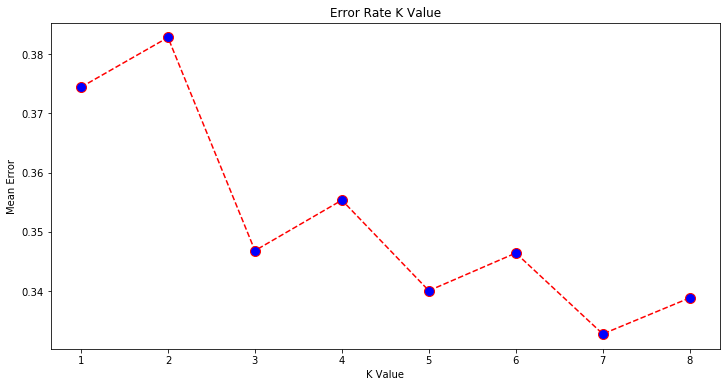

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 9), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

As we can see from the plot above, we obtain the lowest error with K = 8, so let's use 8 as K parameter:

In [39]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [40]:
y_pred = classifier.predict(x_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.76      0.69      3688
         1.0       0.70      0.57      0.63      3699

    accuracy                           0.66      7387
   macro avg       0.67      0.66      0.66      7387
weighted avg       0.67      0.66      0.66      7387



The KNN accuracy is around 0.66 / 0.67, so not that great.
Let's try Neural Networks!

# Deep Neural Networks

Finally, let's see if we can build a neural network that can achieve a greater accuracy than the Logistic Regression and SVM models.

In [42]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [43]:
input_cols = inputs.shape[1]

# define the keras model
model = Sequential()
model.add(Dense(1000, input_dim=input_cols, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
model.fit(x_train, y_train, epochs=10, batch_size=150)

Epoch 1/10
22161/22161 [==============================] - 5s 239us/step - loss: 0.6385 - accuracy: 0.66020s - loss: 0.6411 - accura
Epoch 2/10
22161/22161 [==============================] - 5s 224us/step - loss: 0.6114 - accuracy: 0.6930
Epoch 3/10
22161/22161 [==============================] - 6s 264us/step - loss: 0.5997 - accuracy: 0.6981
Epoch 4/10
22161/22161 [==============================] - 6s 257us/step - loss: 0.5900 - accuracy: 0.69790s - loss: 0.5904 - accuracy: 0.
Epoch 5/10
22161/22161 [==============================] - 6s 263us/step - loss: 0.5820 - accuracy: 0.7038
Epoch 6/10
22161/22161 [==============================] - 6s 271us/step - loss: 0.5752 - accuracy: 0.7069
Epoch 7/10
22161/22161 [==============================] - 6s 274us/step - loss: 0.5713 - accuracy: 0.7086
Epoch 8/10
22161/22161 [==============================] - 6s 255us/step - loss: 0.5663 - accuracy: 0.7096
Epoch 9/10
22161/22161 [==============================] - 6s 277us/step - loss: 0.5631 - accur

In [46]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

7387/7387 [==============================] - 1s 162us/step
Test accuracy: 0.7017734050750732


As we can see we achieved around 0.701 accuracy, almost enough to beat the Logistic Regression model.

However, we'll decide to make use of the Logistic Regression model since we can predicts probabilities that each player has to win the match!

In this way, we can define the "predicted" odds for any given match calculating the logistic regression formula on the inputs features.

So let's save our Logistic Regression model, we're going to use it in the next notebook!

In [47]:
import pickle

In [48]:
filename = 'logistic_regression.lr'
pickle.dump(lreg, open(filename, 'wb'))

Now that we have saved our model, let's create a coefficients dataframe, so that we associate each input column with the appropriate weight:

In [49]:
cols = list(inputs.columns)
coefs = lreg.coef_.tolist()[0]

coef_df_list = []
for i in range(0,inputs.shape[1]):
    col = cols[i]
    coef = coefs[i]
    coef_df_list.append({"Column":col,"Coef":coef})

coef_df = pd.DataFrame(coef_df_list)

In [50]:
coef_df.to_csv("csv/Coefficients.csv", index=False)